# Surprise Housing - Housing Price Predication & Analysis Project
By Pooja Mandaokar

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
# importing dataset Train CSV file using Pandas libarary
df = pd.read_csv('HouseTrain.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

In [3]:
df.shape

(1168, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833        

# Dataset Information :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [7]:
pd.set_option('display.max_columns',None)

In [8]:
df.duplicated().sum()

0

# Checking Null Values

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                   1161       99.400685
MiscFeature              1124       96.232877
Alley                    1091       93.407534
Fence                     931       79.708904
FireplaceQu               551       47.174658
LotFrontage               214       18.321918
GarageYrBlt                64        5.479452
GarageFinish               64        5.479452
GarageType                 64        5.479452
GarageQual                 64        5.479452
GarageCond                 64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtCond                   30        2.568493
BsmtFinType1               30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
Id                          0        0.000000
Functional                  0        0.000000
Fireplaces                  0     

# Missing Values Imputation

In [11]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [12]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

In [13]:
df['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [14]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [15]:
df['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [16]:
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [17]:
df['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [18]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [19]:
df['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [20]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [21]:
df['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [22]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [23]:
df['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [24]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [25]:
df['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [26]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [27]:
df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [28]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [29]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)

In [30]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace=True)

In [31]:
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)

In [32]:
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)

In [33]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace=True)

In [34]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Id                          0             0.0
FullBath                    0             0.0
Fireplaces                  0             0.0
Functional                  0             0.0
TotRmsAbvGrd                0             0.0
KitchenQual                 0             0.0
KitchenAbvGr                0             0.0
BedroomAbvGr                0             0.0
HalfBath                    0             0.0
BsmtHalfBath                0             0.0
MSSubClass                  0             0.0
BsmtFullBath                0             0.0
GrLivArea                   0             0.0
LowQualFinSF                0             0.0
2ndFlrSF                    0             0.0
1stFlrSF                    0             0.0
Electrical                  0             0.0
CentralAir                  0             0.0
GarageType                  0             0.0
GarageYrBlt                 0             0.0
GarageFinish                0     

In [35]:
df.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage    1168.0      70.988470     22.437056     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1168.0     102.310078    182.047152      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1168.0    1978.193841     24.198559   1900.0    1962.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                         50%        75%       max  
Id                714.500000    1079.50    1460.0  
MSSubClass         50.000000      70.00     190.0  
LotFrontage        70.988470      79.25     313.0  
LotArea          9522.500000   11515.50  164660.0  
OverallQual         6.000000       7.00      10.0  
OverallCond         5.000000       6.00       9.0  
YearBuilt        1972.000000    2000.00    2010.0  
YearRemodAdd     1993.000000    2004.00    2010.0  
MasVnrArea          0.000000     160.00    1600.0  
BsmtFinSF1        385.500000     714.50    5644.0  
BsmtFinSF2          0.000000       0.00    1474.0  
BsmtUnfSF         474.000000     816.00    2336.0  
TotalBsmtSF      1005.500000    1291.50    6110.0  
1stFlrSF         1096.500000    1392.00    4692.0  
2ndFlrSF            0.000000     729.00    2065.0  
LowQualFinSF        0.000000       0.00     572.0  
GrLivArea        1468.500000    1795.00    5642.0  
BsmtFullBath        0.000000       1.00       3.0  
BsmtHalfBath        0.000000       0.00       2.0  
FullBath            2.000000       2.00       3.0  
HalfBath            0.000000       1.

# Feature Extraction for Property Age Related Features

In [36]:
# Converting years column to age column
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_Since'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [37]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

# Data Cleaning & Preprocessing on Test Dataset

In [40]:
# Reading Test Dataset
dft = pd.read_csv('HouseTest.csv')

In [41]:
print('No. of Rows :',dft.shape[0])
print('No. of Columns :', dft.shape[1])
pd.set_option('display.max_columns',None) # this will enable us to see truncated columns
dft.head()

No. of Rows : 292
No. of Columns : 80


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

# Missing Value Imputation in Test Dataset

In [43]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = dft.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(dft))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                    292      100.000000
MiscFeature               282       96.575342
Alley                     278       95.205479
Fence                     248       84.931507
FireplaceQu               139       47.602740
LotFrontage                45       15.410959
GarageType                 17        5.821918
GarageYrBlt                17        5.821918
GarageQual                 17        5.821918
GarageCond                 17        5.821918
GarageFinish               17        5.821918
BsmtCond                    7        2.397260
BsmtFinType2                7        2.397260
BsmtFinType1                7        2.397260
BsmtQual                    7        2.397260
BsmtExposure                7        2.397260
MasVnrArea                  1        0.342466
MasVnrType                  1        0.342466
Electrical                  1        0.342466
HalfBath                    0        0.000000
BsmtFullBath                0     

In [44]:
# Removing columns with high missing value percentage
dft.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [45]:
dft['LotFrontage'] = dft['LotFrontage'].fillna(dft['LotFrontage'].mean())
dft['GarageType'] = dft['GarageType'].fillna(dft['GarageType'].mode()[0])
dft['GarageYrBlt']= dft['GarageYrBlt'].fillna(dft['GarageYrBlt'].mode()[0])
dft['GarageFinish']= dft['GarageFinish'].fillna(dft['GarageFinish'].mode()[0])
dft['GarageQual'] = dft['GarageQual'].fillna(dft['GarageQual'].mode()[0])
dft['GarageCond'] = dft['GarageCond'].fillna(dft['GarageCond'].mode()[0])
dft['BsmtFinType2'] = dft['BsmtFinType2'].fillna(dft['BsmtFinType2'].mode()[0])
dft['BsmtExposure'] = dft['BsmtExposure'].fillna(dft['BsmtExposure'].mode()[0])
dft['BsmtFinType1'] = dft['BsmtFinType1'].fillna(dft['BsmtFinType1'].mode()[0])
dft['BsmtCond'] = dft['BsmtCond'].fillna(dft['BsmtCond'].mode()[0])
dft['BsmtQual'] = dft['BsmtQual'].fillna(dft['BsmtQual'].mode()[0])
dft['MasVnrType'] = dft['MasVnrType'].fillna(dft['MasVnrType'].mode()[0])
dft['MasVnrArea'] = dft['MasVnrArea'].fillna(dft['MasVnrArea'].mean())
dft['Electrical'] = dft['Electrical'].fillna(dft['Electrical'].mode()[0])

# Exploratory Data Analysis

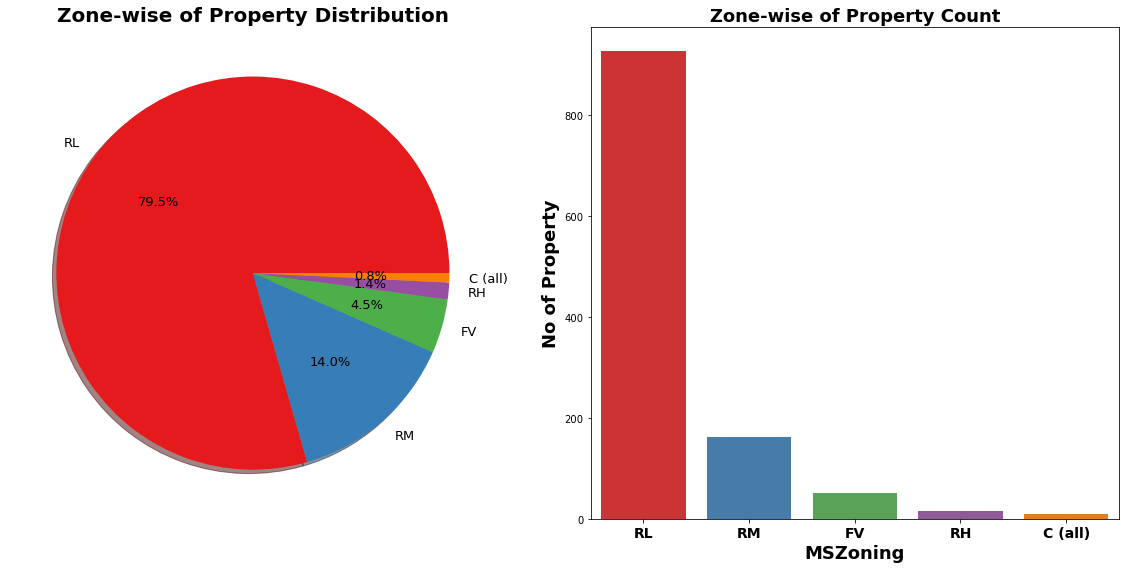

In [47]:
# Exploring MSZoning Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['MSZoning'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Zone-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('MSZoning',data=df,ax=ax[1])
ax[1].set_title('Zone-wise of Property Count',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("MSZoning",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

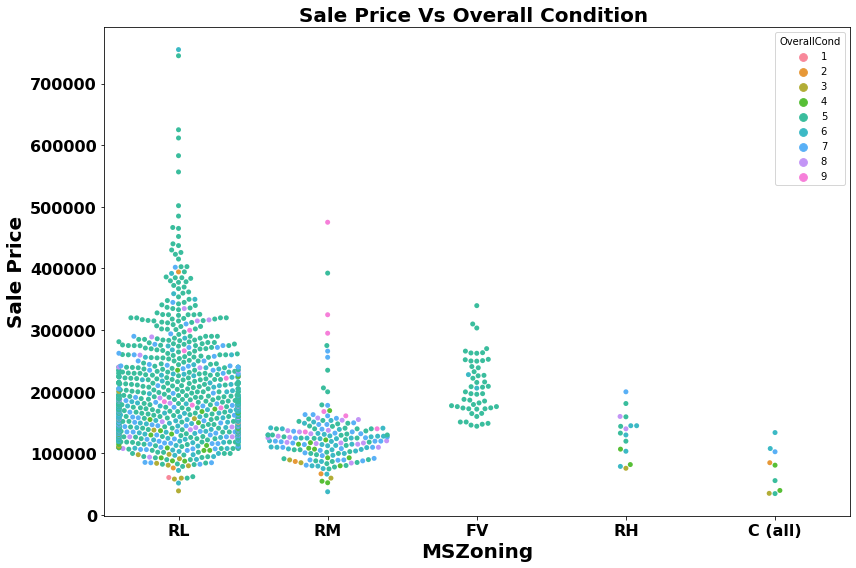

In [48]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('gnuplot2_r')
plt.figure(figsize=(12,8))
sns.swarmplot(y=df['SalePrice'], x=df['MSZoning'], hue =df['OverallCond'])
plt.title("Sale Price Vs Overall Condition ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 20,fontweight ='bold')
plt.ylabel('Sale Price',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

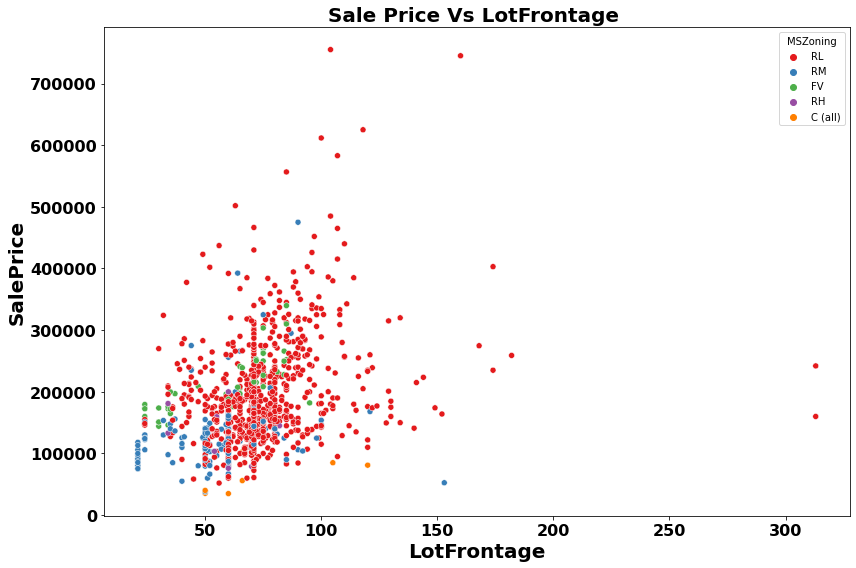

In [49]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotFrontage'], hue =df['MSZoning'])
plt.title("Sale Price Vs LotFrontage ",fontsize=20,fontweight ='bold')
plt.xlabel('LotFrontage',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

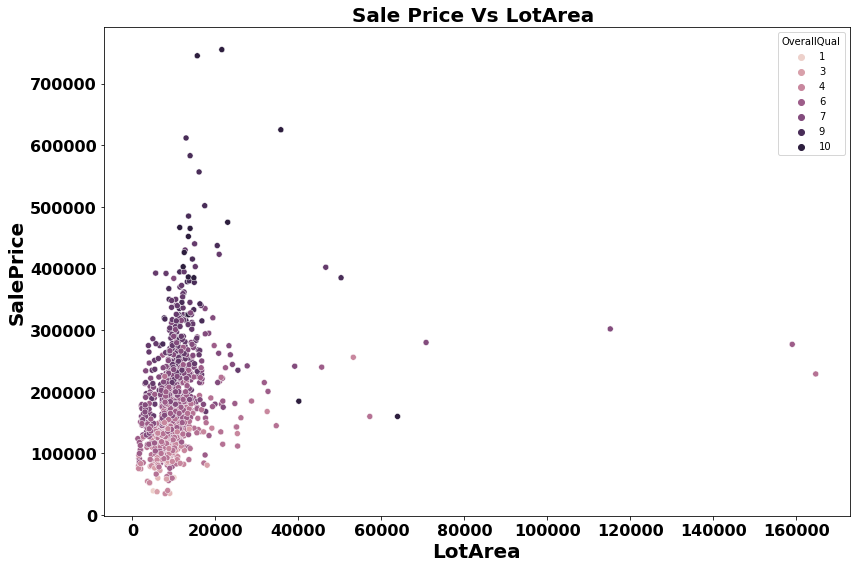

In [50]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotArea'], hue =df['OverallQual'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

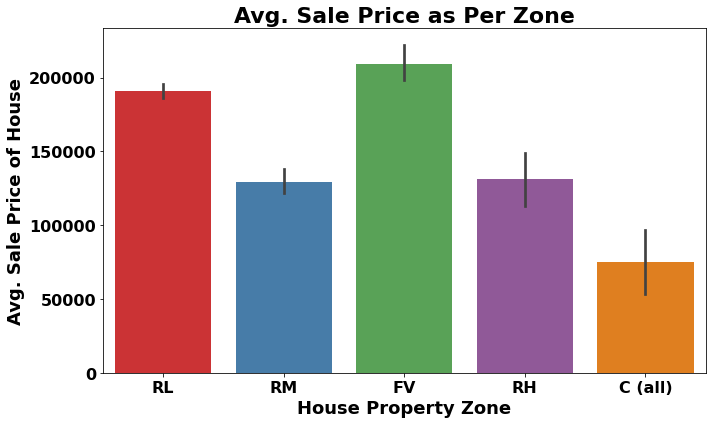

In [51]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette("Set1")
plt.figure(figsize = (10,6))
sns.barplot(y = df['SalePrice'], x= df['MSZoning'])
plt.title('Avg. Sale Price as Per Zone', fontsize=22, fontweight='bold')
plt.xlabel('House Property Zone', fontsize= 18, fontweight='bold')
plt.ylabel('Avg. Sale Price of House', fontsize=18, fontweight= 'bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()


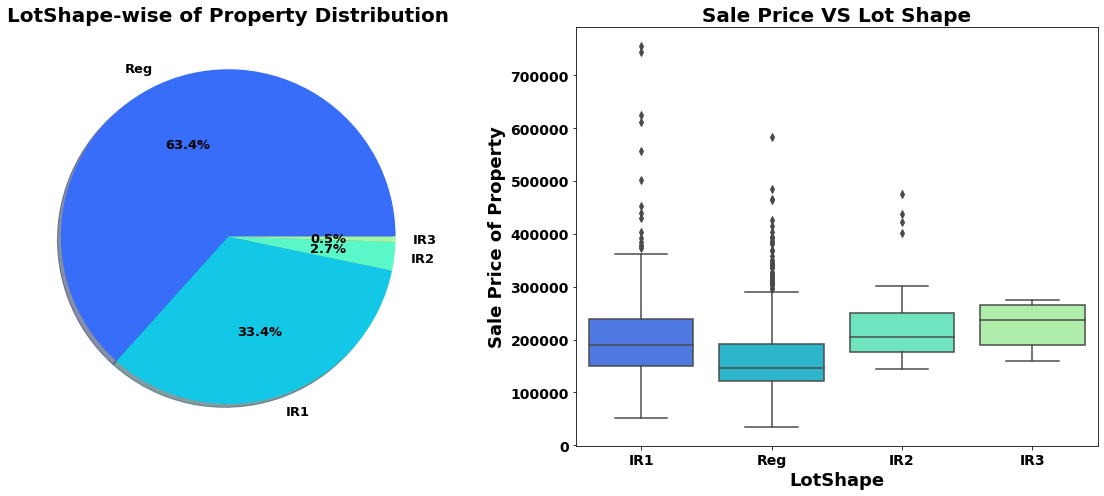

In [52]:
# Exploring LotShape Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LotShape'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotShape-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LotShape'], ax=ax[1])
ax[1].set_title('Sale Price VS Lot Shape',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotShape",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

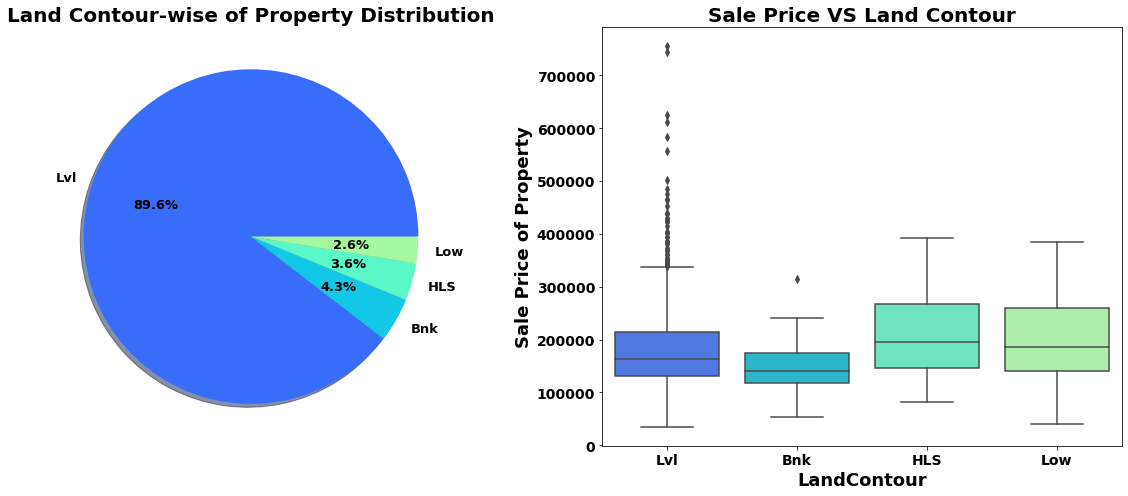

In [53]:
# Exploring LandContour Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LandContour'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Land Contour-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LandContour'], ax=ax[1])
ax[1].set_title('Sale Price VS Land Contour',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandContour",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

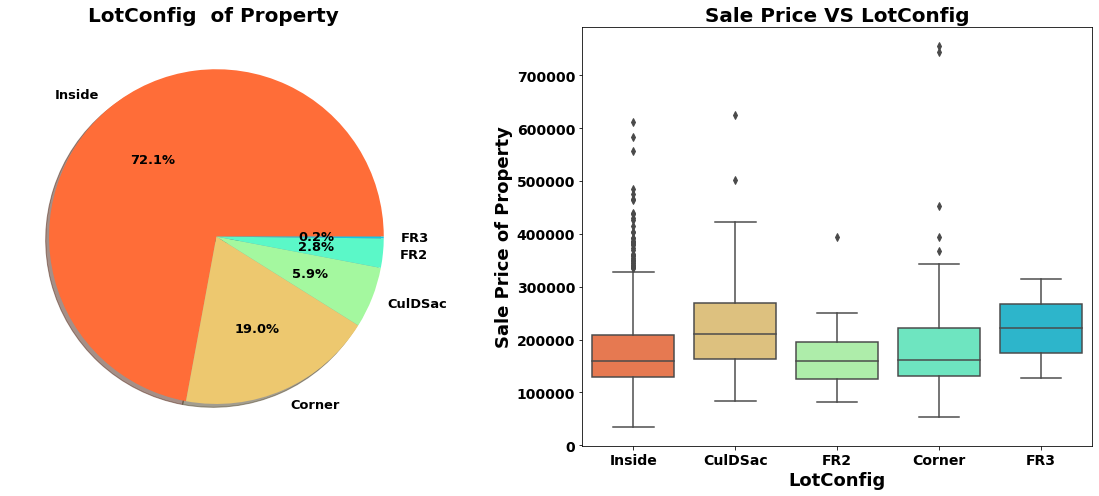

In [54]:
# Exploring LotConfig Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LotConfig'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotConfig  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LotConfig'], ax=ax[1])
ax[1].set_title('Sale Price VS LotConfig',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotConfig",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

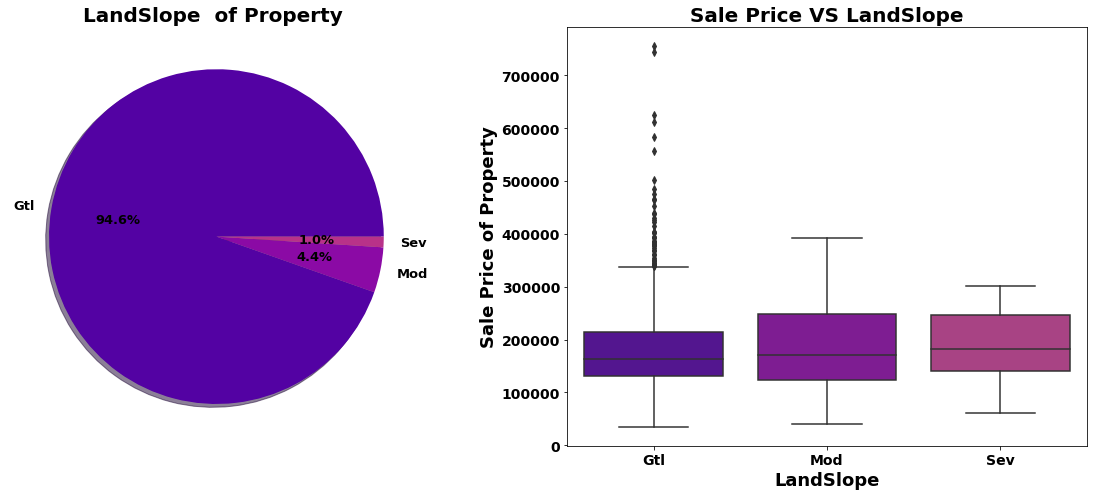

In [55]:
# Exploring LandSlope Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LandSlope'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LandSlope  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LandSlope'], ax=ax[1])
ax[1].set_title('Sale Price VS LandSlope',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandSlope",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

In [56]:
Feature_grp1 = ["BldgType", "HouseStyle", "OverallQual", "OverallCond"]

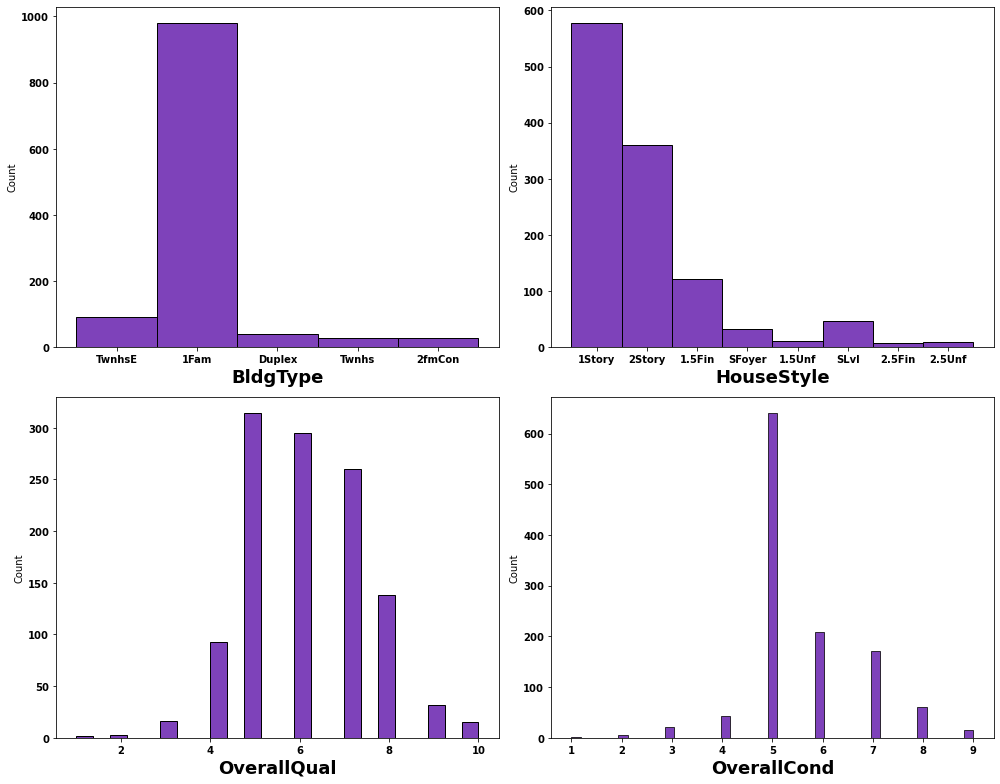

In [57]:
plt.figure(figsize=(14,11),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.histplot( df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

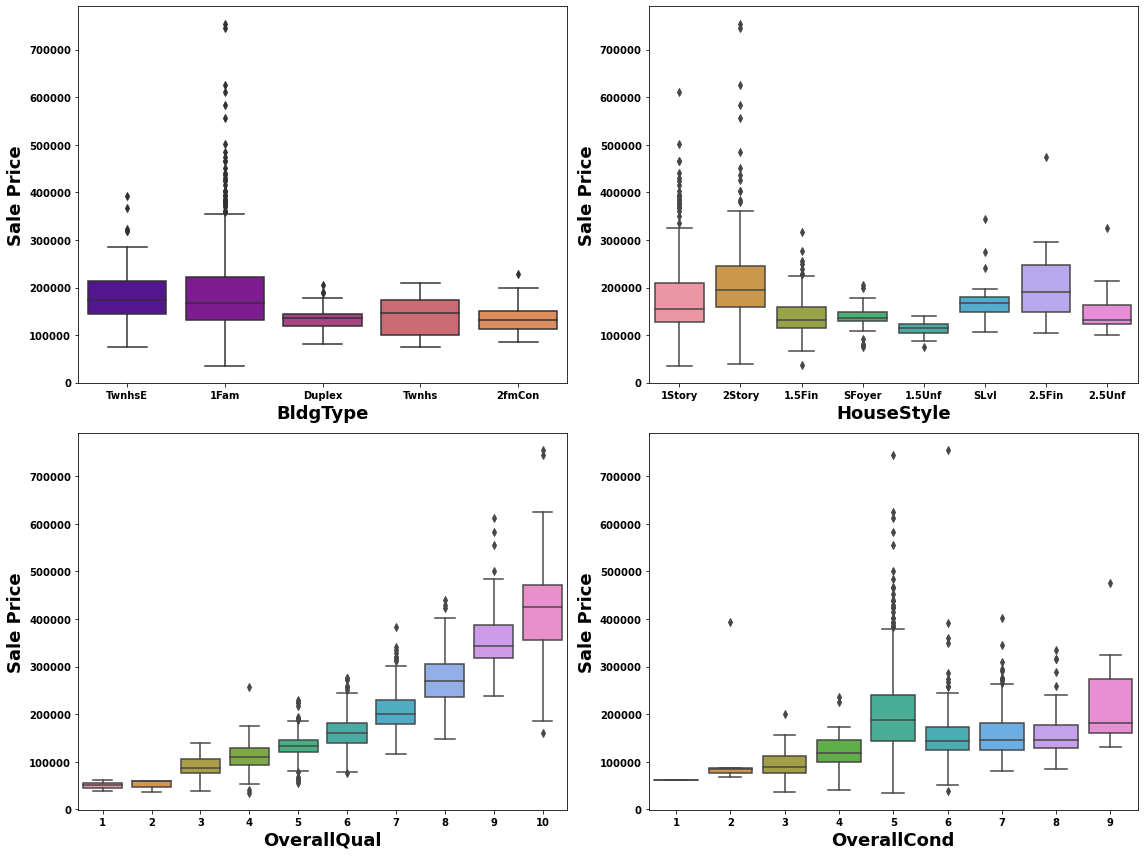

In [58]:
plt.figure(figsize=(16,12),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()


In [59]:
df.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [60]:
Feature_grp2 = ["Year_SinceBuilt", "Year_SinceRemodAdded", 'Year_Since_Sold', "GarageAge"]

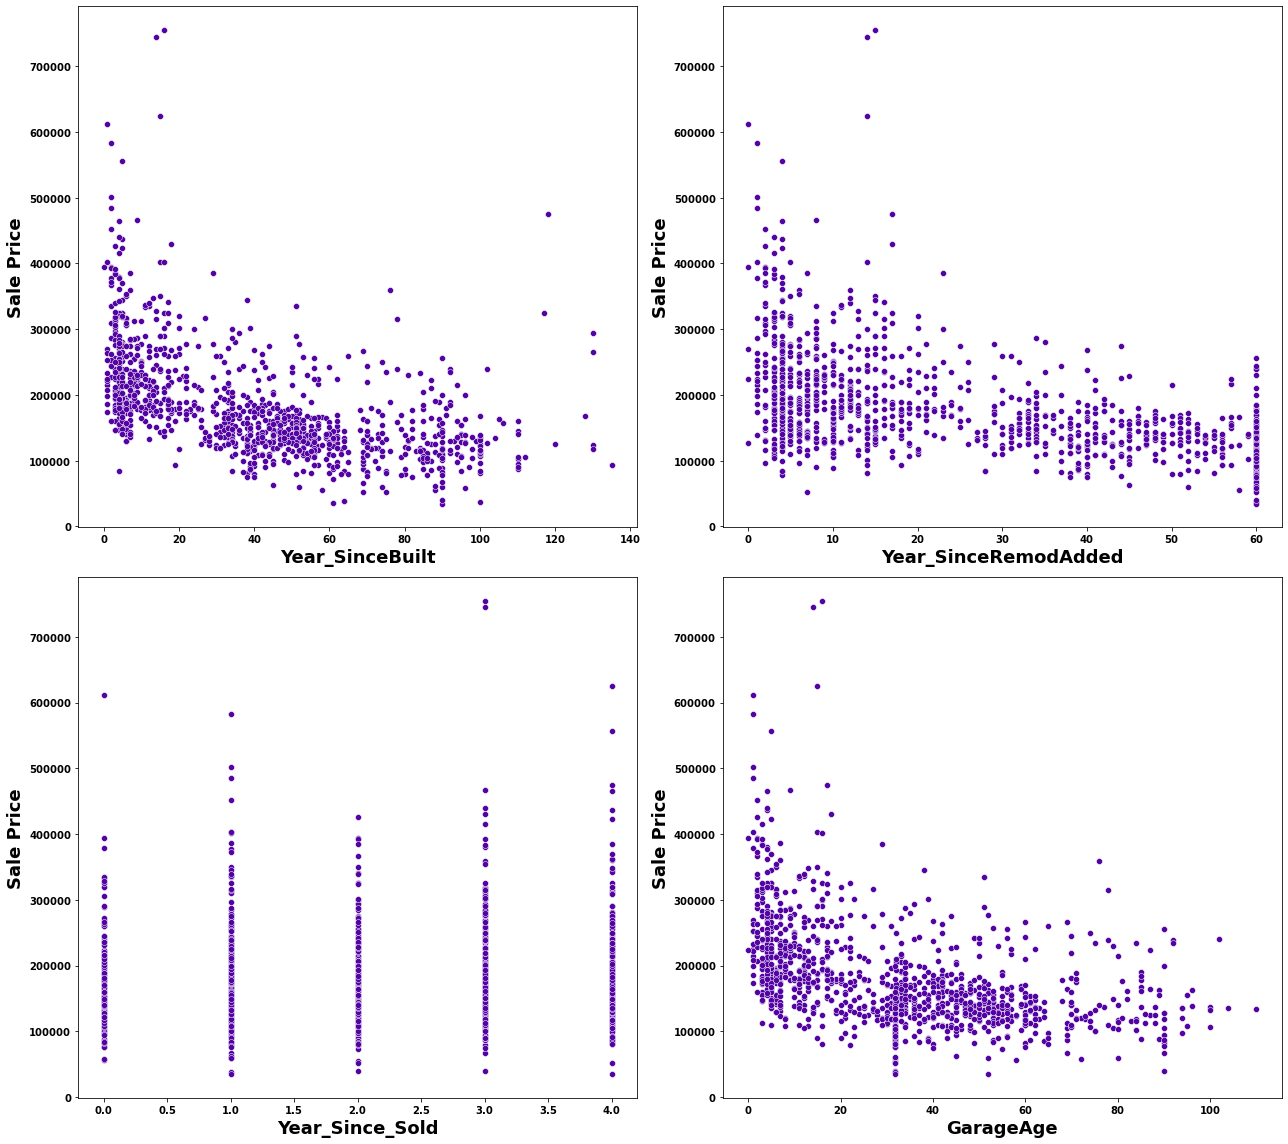

In [61]:
plt.figure(figsize=(18,16),facecolor='white')
plotnumber=1

for i in Feature_grp2:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.scatterplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

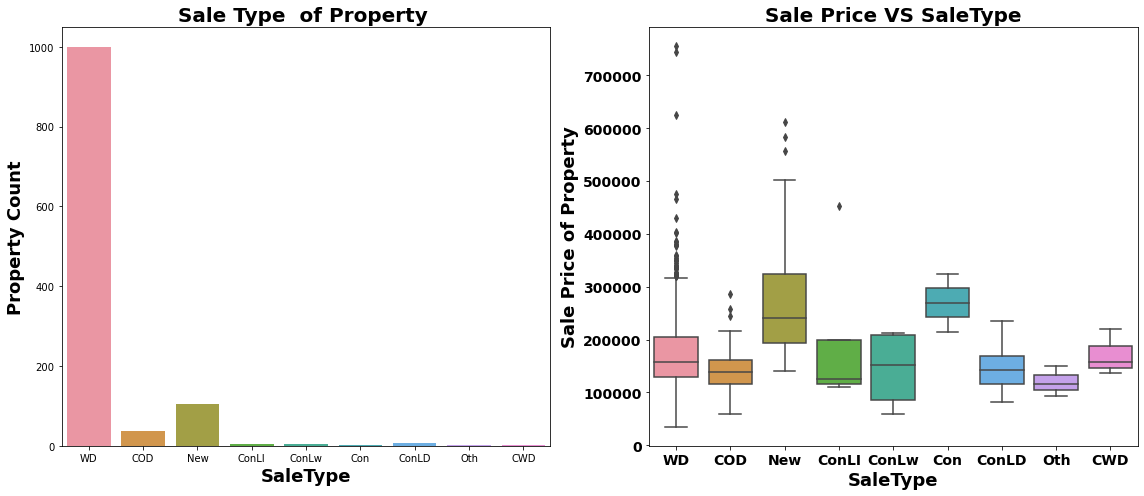

In [62]:
# Exploring SaleType Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleType',data=df,ax=ax[0])
ax[0].set_title('Sale Type  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('SaleType', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['SaleType'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleType',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleType",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

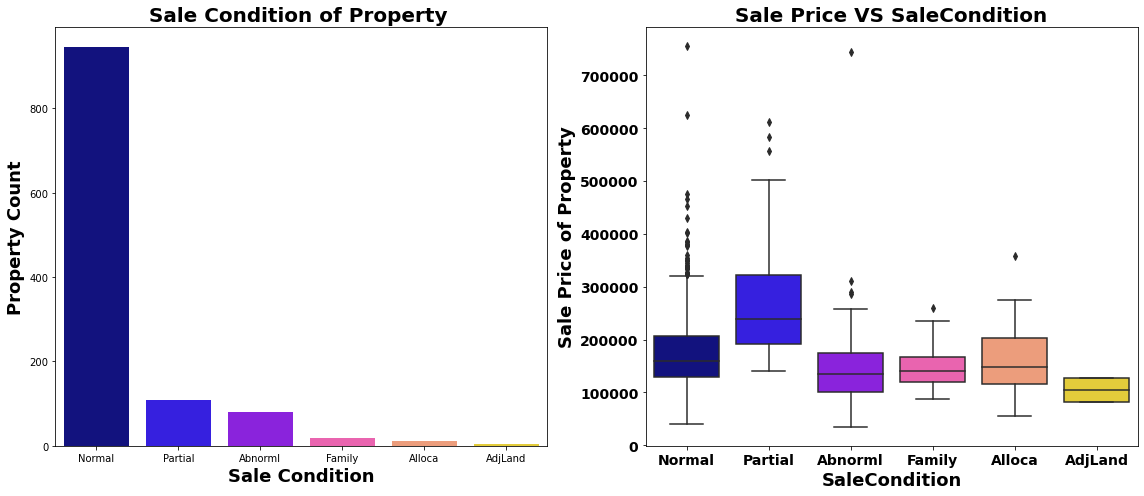

In [63]:
# Exploring SaleCondition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleCondition',data=df,ax=ax[0])
ax[0].set_title('Sale Condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Sale Condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['SaleCondition'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleCondition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleCondition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Investigation of Relation between Floor Area and Sale Price
It is common known fact that as Floor area increases the cost of Properties get increases.

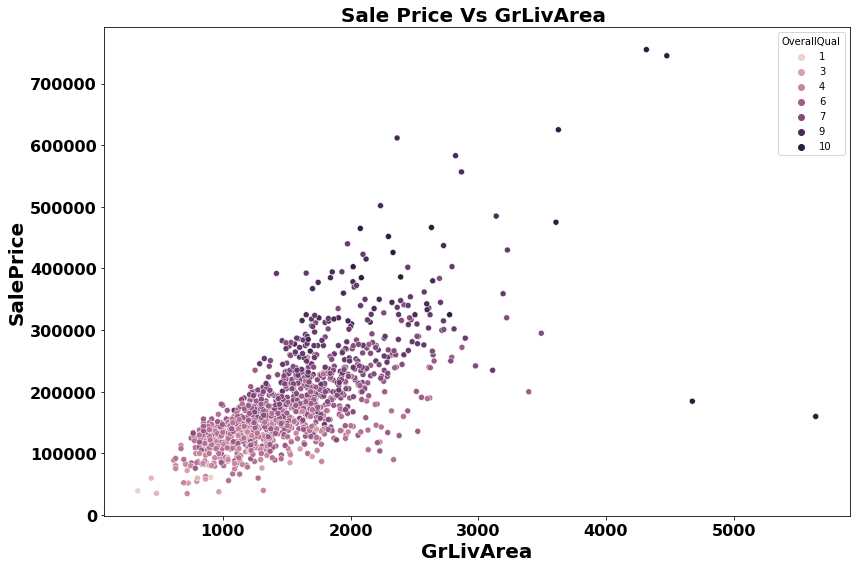

In [64]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['OverallQual'])
plt.title("Sale Price Vs GrLivArea ",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# RoofStyle

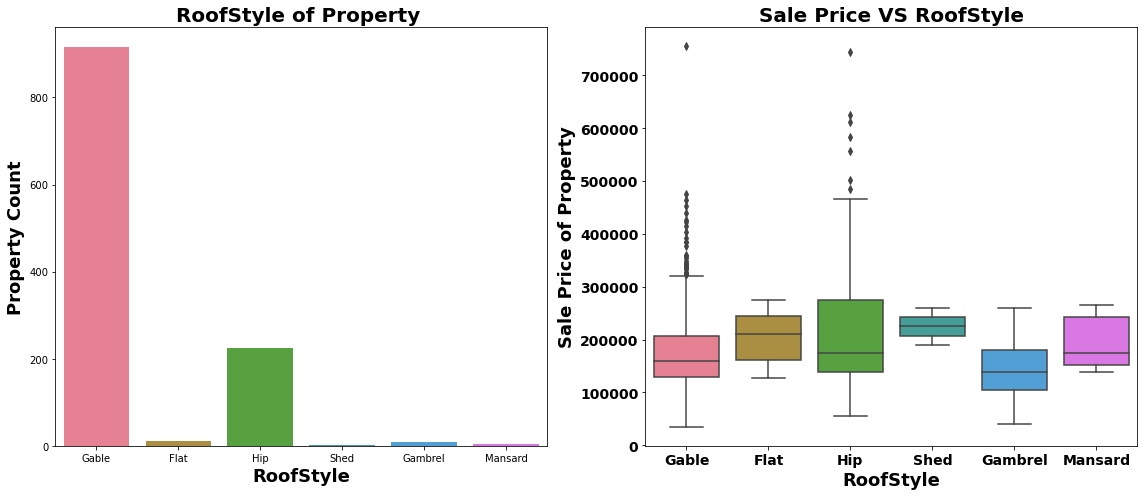

In [68]:
# Exploring RoofStyle Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('RoofStyle',data=df,ax=ax[0])
ax[0].set_title('RoofStyle of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofStyle', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['RoofStyle'], ax=ax[1])
ax[1].set_title('Sale Price VS RoofStyle',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("RoofStyle",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()


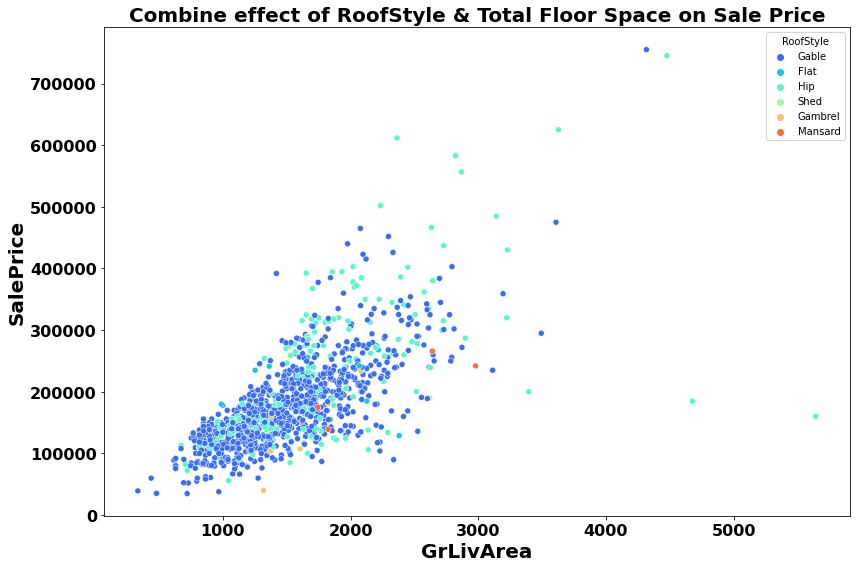

In [69]:
# Combine effect of RoofStyle & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['RoofStyle'])
plt.title("Combine effect of RoofStyle & Total Floor Space on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# RoofMatl 

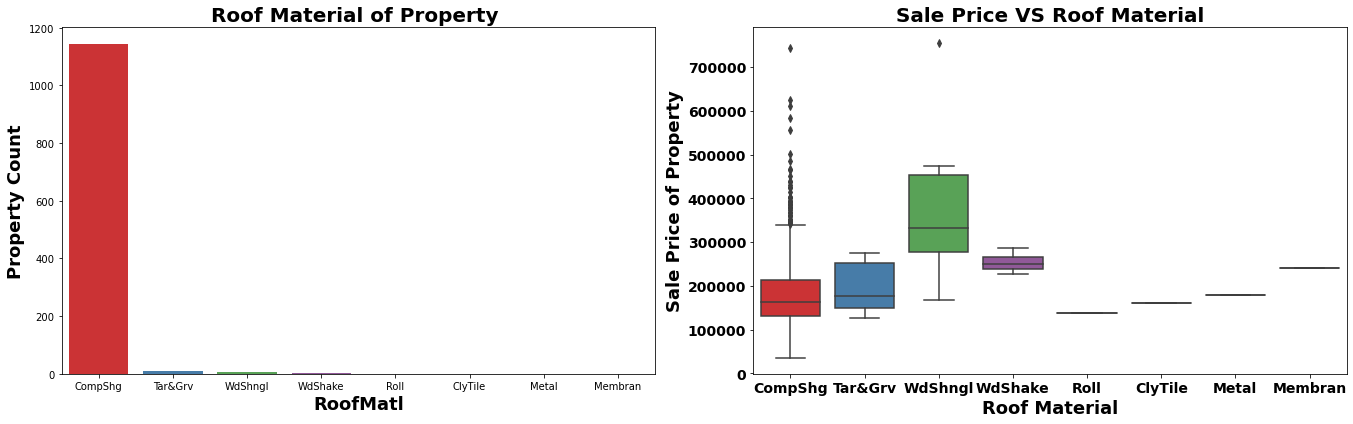

In [70]:
# Exploring RoofMatl Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(19,6))
sns.countplot('RoofMatl',data=df,ax=ax[0])
ax[0].set_title('Roof Material of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofMatl', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['RoofMatl'], ax=ax[1])
ax[1].set_title('Sale Price VS Roof Material',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Roof Material",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

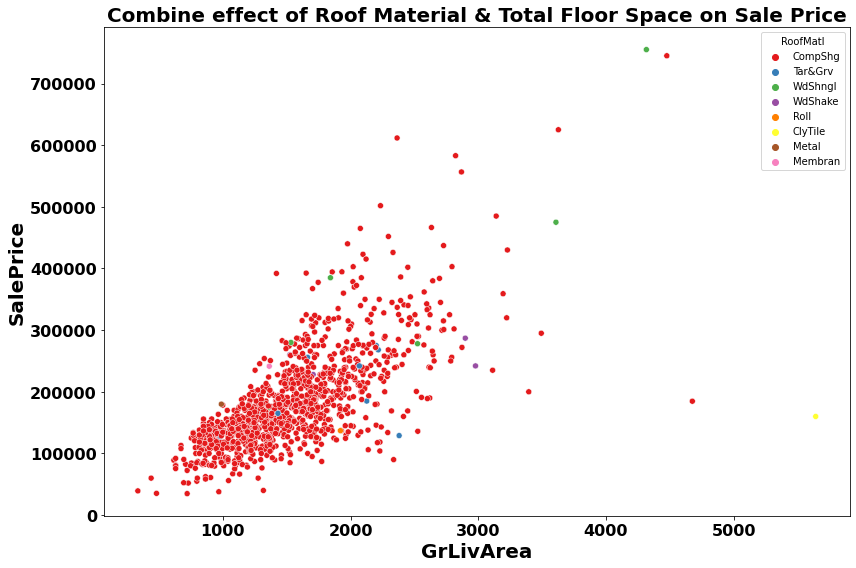

In [71]:
# Combine effect of RoofMatl & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['GrLivArea'], hue =df['RoofMatl'])
plt.title("Combine effect of Roof Material & Total Floor Space on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# Exploration of House Exterior covering features

In [72]:
Feature_grp3 = ["Exterior1st","Exterior2nd", "MasVnrType", "ExterQual", "ExterCond"]

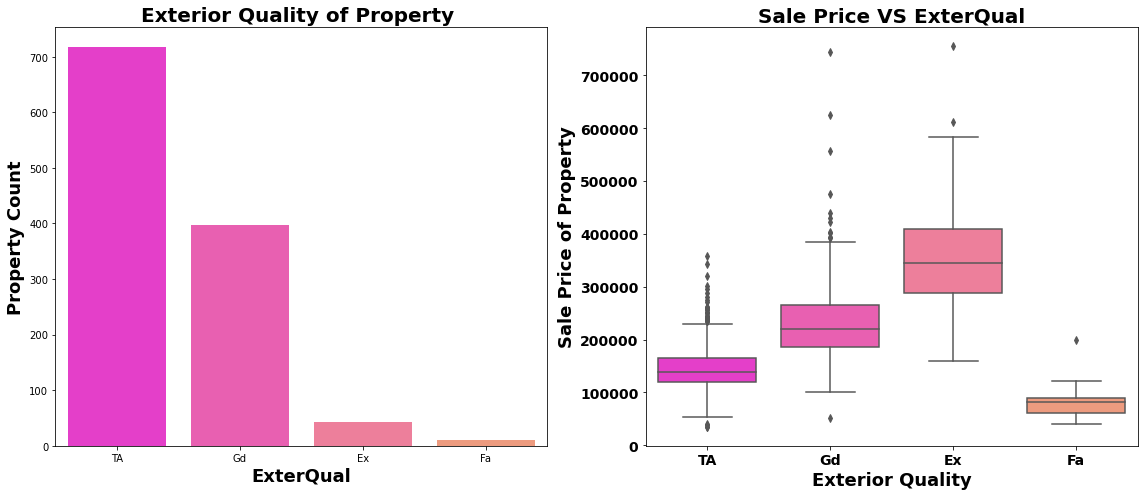

In [73]:
# Exploring ExterQual Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('spring')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('ExterQual',data=df,ax=ax[0])
ax[0].set_title('Exterior Quality of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('ExterQual', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['ExterQual'], ax=ax[1])
ax[1].set_title('Sale Price VS ExterQual',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Exterior Quality",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

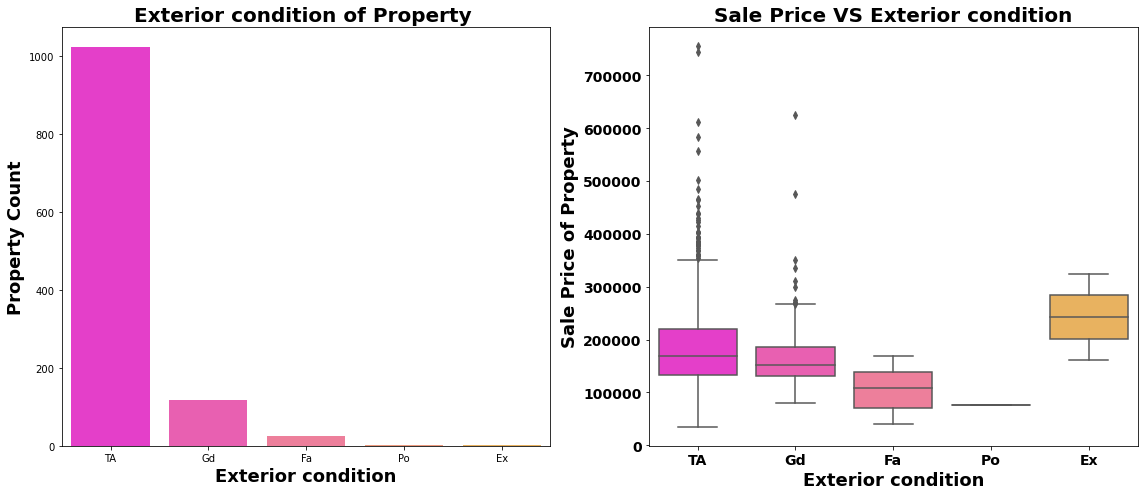

In [74]:
# Exploring Exterior condition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('spring')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('ExterCond',data=df,ax=ax[0])
ax[0].set_title('Exterior condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Exterior condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=df['SalePrice'], x=df['ExterCond'], ax=ax[1])
ax[1].set_title('Sale Price VS Exterior condition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Exterior condition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

# Foundation Vs Sale Price

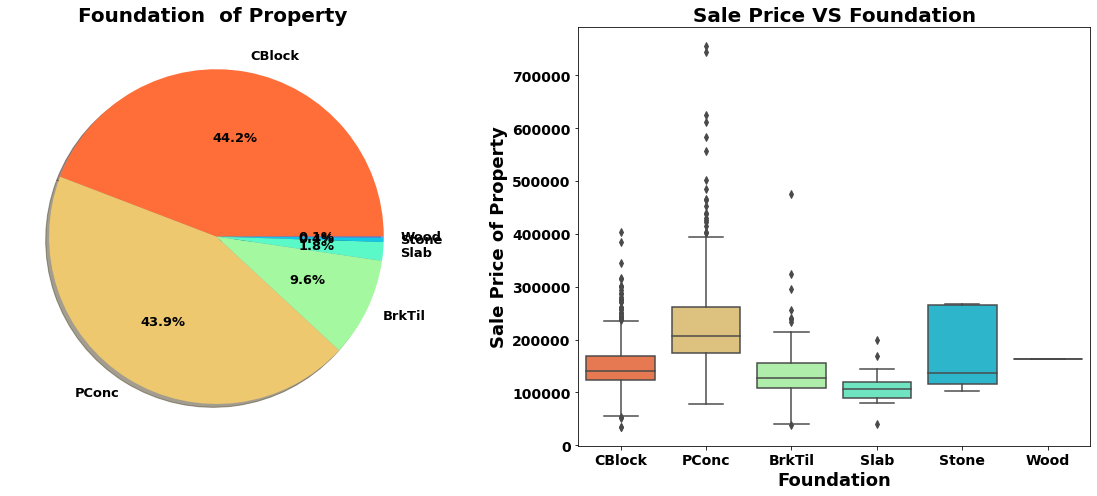

In [75]:
# Exploring LotConfig Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Foundation'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Foundation  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['Foundation'], ax=ax[1])
ax[1].set_title('Sale Price VS Foundation',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Foundation",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

In [76]:
Feature_grp4= ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

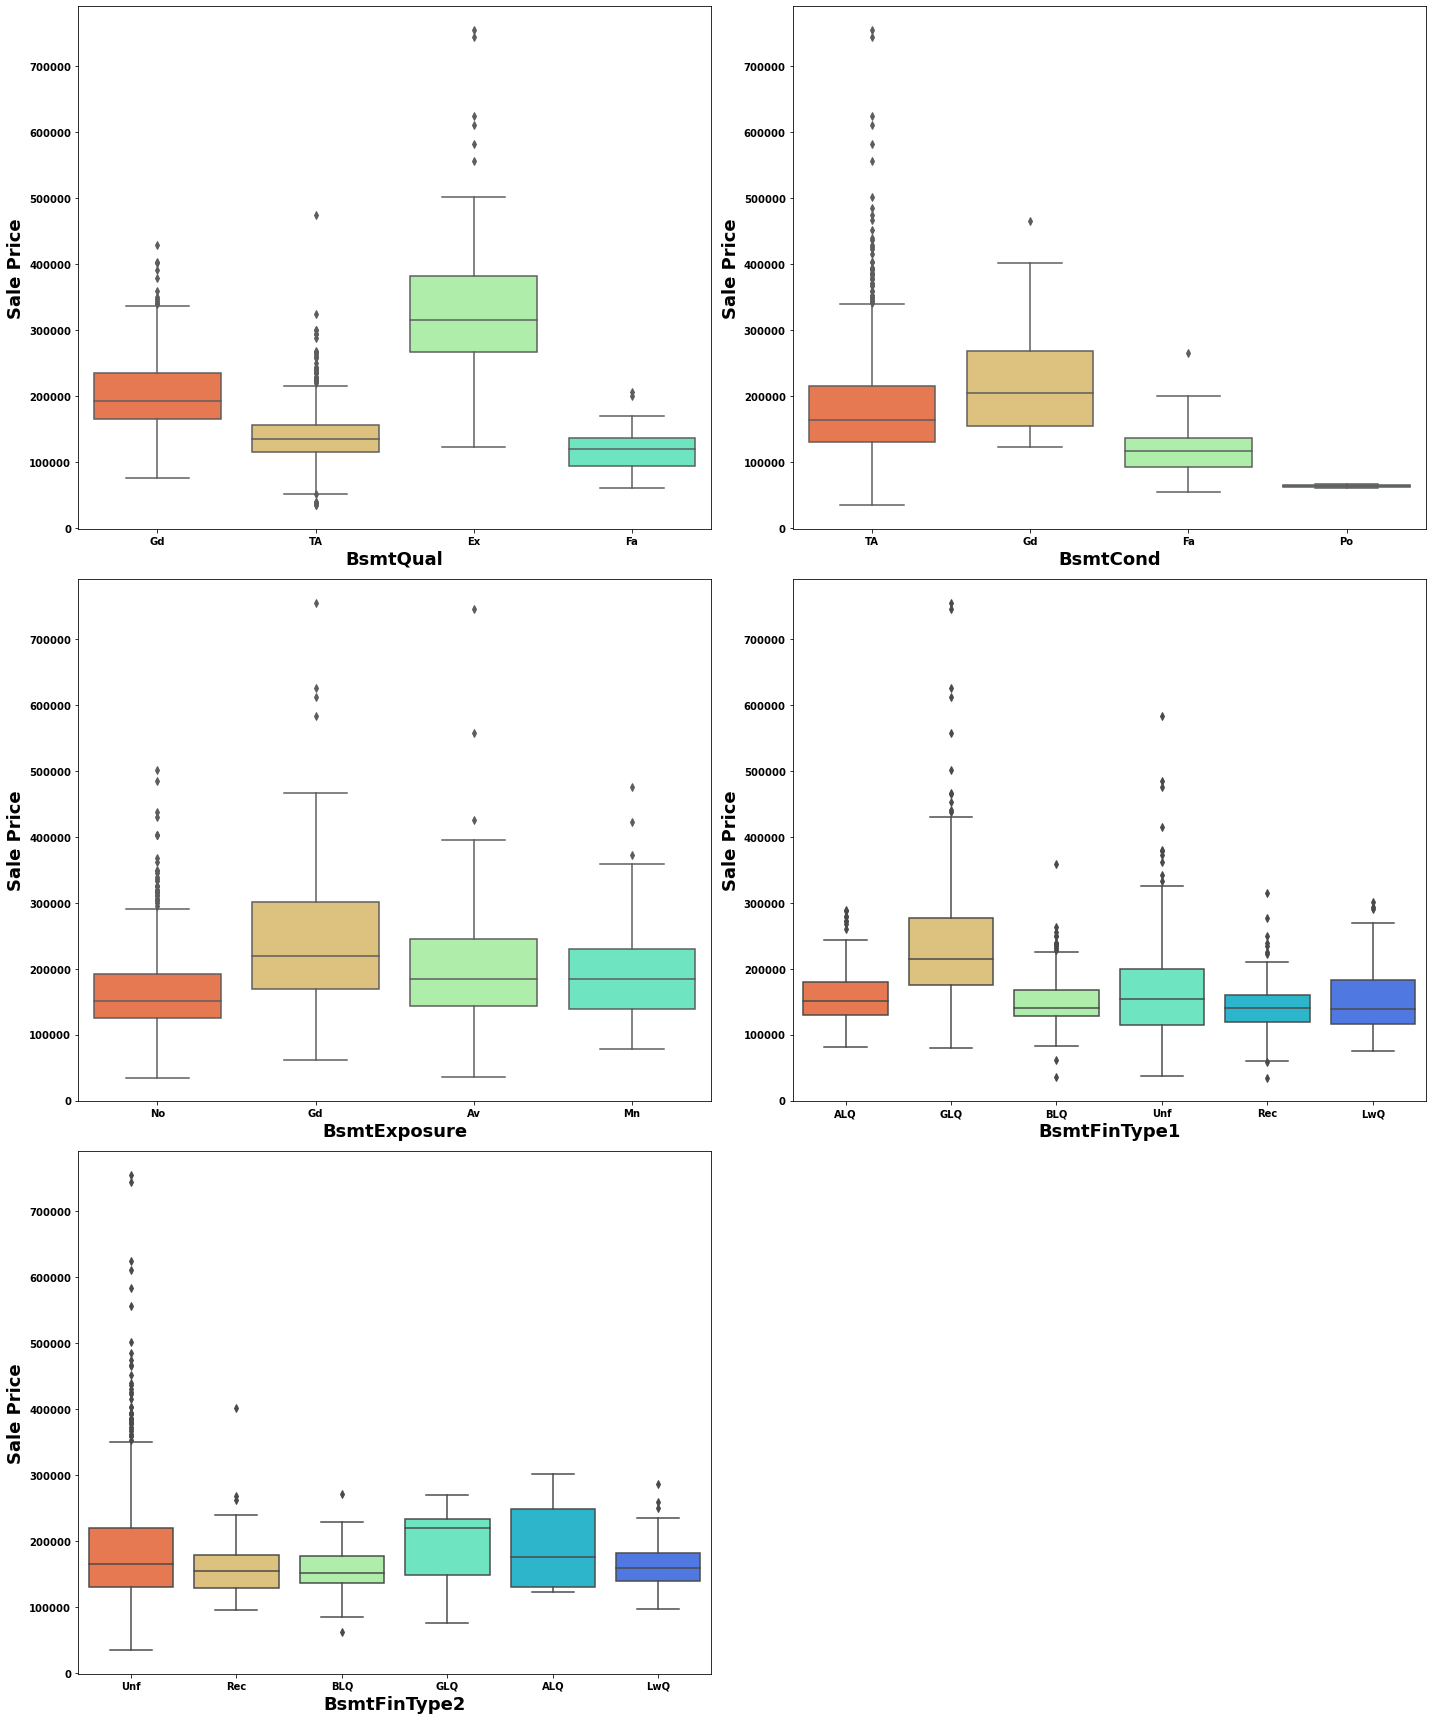

In [77]:
plt.figure(figsize=(20,24),facecolor='white')
plotnumber=1

for i in Feature_grp4:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        
        sns.boxplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

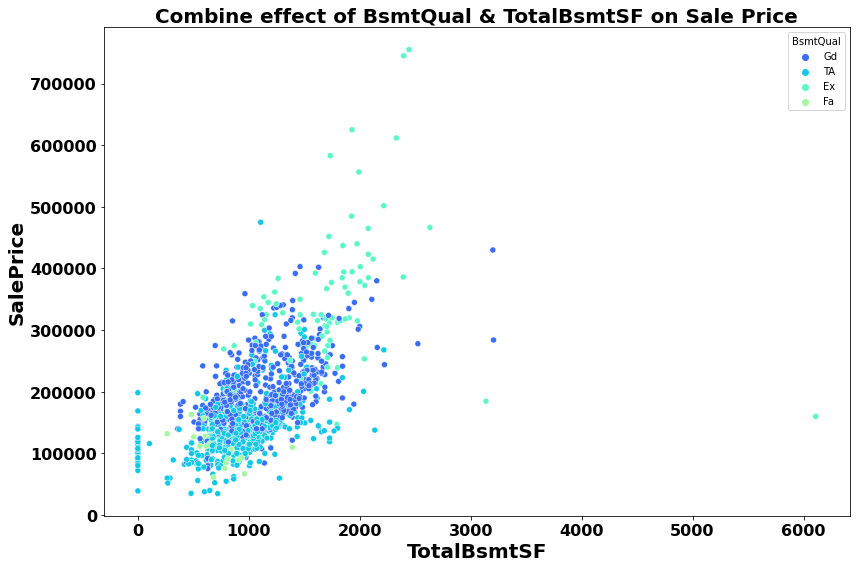

In [78]:
# Combine effect of RoofStyle & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['TotalBsmtSF'], hue =df['BsmtQual'])
plt.title("Combine effect of BsmtQual & TotalBsmtSF on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('TotalBsmtSF',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

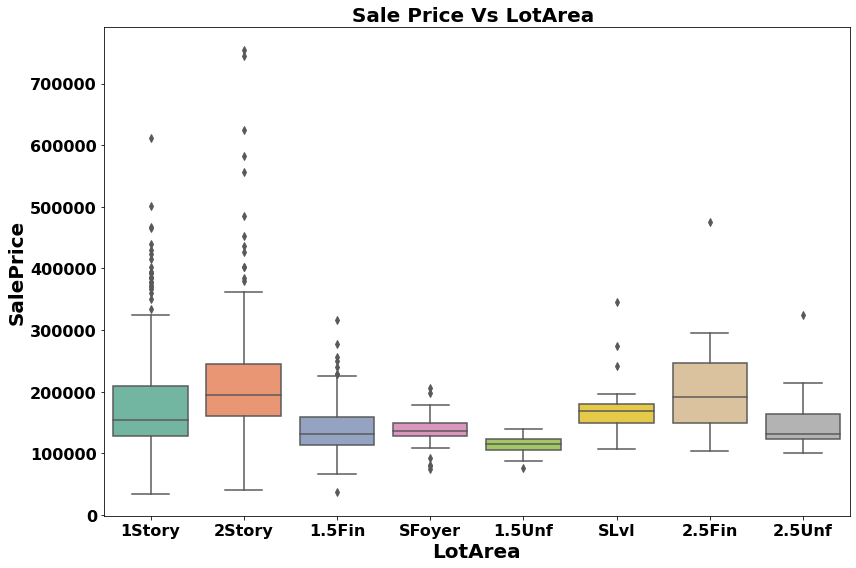

In [79]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set2')
plt.figure(figsize=(12,8))
sns.boxplot(y=df['SalePrice'], x=df['HouseStyle'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

# Feature Engineering

In [80]:
df['ScreenPorch'].value_counts()

0      1073
192       5
224       5
189       4
180       3
120       3
168       3
160       3
126       3
144       2
288       2
176       2
142       2
184       2
147       2
100       2
200       2
90        2
216       2
260       1
287       1
198       1
170       1
440       1
175       1
385       1
161       1
163       1
197       1
145       1
259       1
143       1
252       1
190       1
291       1
40        1
322       1
154       1
156       1
165       1
60        1
63        1
225       1
95        1
265       1
53        1
480       1
128       1
140       1
410       1
204       1
155       1
182       1
116       1
178       1
185       1
153       1
266       1
222       1
271       1
273       1
99        1
122       1
80        1
130       1
Name: ScreenPorch, dtype: int64

In [81]:
df['3SsnPorch'].value_counts()

0      1146
168       3
216       2
180       2
144       2
153       1
23        1
304       1
130       1
182       1
290       1
238       1
245       1
162       1
96        1
140       1
196       1
508       1
Name: 3SsnPorch, dtype: int64

In [82]:
df['MiscVal'].value_counts()

0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64

In [83]:
df['PoolArea'].value_counts()

0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64

In [84]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL     70.98847     4928   Pave      IR1         Lvl   
1  889          20       RL     95.00000    15865   Pave      IR1         Lvl   
2  793          60       RL     92.00000     9920   Pave      IR1         Lvl   
3  110          20       RL    105.00000    11751   Pave      IR1         Lvl   
4  422          20       RL     70.98847    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     1Story            6            5     Gable  CompShg     Plywood   
1     1Story            8            6      Flat  Tar&Grv     Wd Sdng   
2     2Story            7            5     Gable  CompShg     MetalSd   
3     1Story            6            6       Hip  CompShg     Plywood   
4     1Story            6            7     Gable  CompShg     CemntBd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     Plywood       None         0.0        TA        TA     CBlock       Gd   
1     Wd Sdng       None         0.0        Gd        Gd      PConc       TA   
2     MetalSd       None         0.0        Gd        TA      PConc       Gd   
3     Plywood    BrkFace       480.0        TA        TA     CBlock       Gd   
4     CmentBd      Stone       126.0        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          ALQ         120          Unf           0   
1       Gd           Gd          ALQ         351          Rec         823   
2       TA           Av          GLQ         862          Unf           0   
3       TA           No          BLQ         705          Unf           0   
4       TA           No          ALQ        1246          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        958         1078    GasA        TA          Y      SBrkr       958   
1       1043         2217    GasA        Ex          Y      SBrkr      2217   
2        255         1117    GasA        Ex          Y      SBrkr      1127   
3       1139         1844    GasA        Ex          Y      SBrkr      1844   
4        356         1602    GasA        Gd          Y      SBrkr      1602   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0             0        958             0             0         2   
1         0             0       2217             1             0         2   
2       886             0       2013             1             0         2   
3         0             0       1844             0             0         2   
4         0             0       1602             0             1         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         0             2             1          TA             5        Typ   
1         0             4             1          Gd             8        Typ   
2         1             3             1          TA             8        Typ   
3         0             3             1          TA             7        Typ   
4         0             3             1          Gd             8        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           1     Attchd          RFn           2         440         TA   
1           1     Attchd          Unf           2         621         TA   
2     

# Data Cleaning

In [85]:
# Droping unnecessary column for further investigation
df.drop(['Id','Utilities'],axis=1,inplace=True)
dft.drop(['Id','Utilities'],axis=1,inplace=True)

In [86]:
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
dft.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

In [87]:
df.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)
dft.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

In [88]:
df.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)
dft.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

# Corrleation

In [89]:
df.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass              1.000000    -0.336681 -0.124151     0.070462   
LotFrontage            -0.336681     1.000000  0.299452     0.229218   
LotArea                -0.124151     0.299452  1.000000     0.107188   
OverallQual             0.070462     0.229218  0.107188     1.000000   
OverallCond            -0.056978    -0.047573  0.017513    -0.083167   
MasVnrArea              0.027813     0.188758  0.121086     0.407230   
TotalBsmtSF            -0.214042     0.356107  0.259733     0.528285   
GrLivArea               0.086448     0.374251  0.281360     0.599700   
BsmtFullBath            0.004556     0.094046  0.142387     0.101732   
BsmtHalfBath            0.008207     0.001389  0.059282    -0.030702   
FullBath                0.140807     0.171773  0.123197     0.548824   
HalfBath                0.168423     0.047816  0.007271     0.296134   
BedroomAbvGr           -0.013283     0.237199  0.117351     0.099639   
KitchenAbvGr            0.283506    -0.002729 -0.013075    -0.178220   
TotRmsAbvGrd            0.051179     0.318771  0.184546     0.432579   
Fireplaces             -0.035792     0.230610  0.285983     0.390067   
GarageCars             -0.027639     0.260252  0.158313     0.596322   
GarageArea             -0.092408     0.322644  0.195162     0.566782   
WoodDeckSF             -0.022609     0.088334  0.216720     0.227137   
OpenPorchSF             0.017468     0.151328  0.093080     0.341030   
MoSold                 -0.016015     0.022517  0.015141     0.090638   
SalePrice              -0.060775     0.323779  0.249499     0.789185   
Year_SinceBuilt        -0.023988    -0.112655 -0.005506    -0.575800   
Year_SinceRemodAdded   -0.056618    -0.088799 -0.027228    -0.555945   
Year_Since_Sold         0.038595     0.003885  0.035399     0.048759   
GarageAge              -0.073130    -0.055992  0.034765    -0.511482   

                      OverallCond  MasVnrArea  TotalBsmtSF  GrLivArea  \
MSSubClass              -0.056978    0.027813    -0.214042   0.086448   
LotFrontage             -0.047573    0.188758     0.356107   0.374251   
LotArea                  0.017513    0.121086     0.259733   0.281360   
OverallQual             -0.083167    0.407230     0.528285   0.599700   
OverallCond              1.000000   -0.137475    -0.162481  -0.065006   
MasVnrArea              -0.137475    1.000000     0.365016   0.386791   
TotalBsmtSF             -0.162481    0.365016     1.000000   0.461067   
GrLivArea               -0.065006    0.386791     0.461067   1.000000   
BsmtFullBath            -0.039680    0.086444     0.296654   0.036206   
BsmtHalfBath             0.091016    0.014196     0.009657  -0.013145   
FullBath                -0.171931    0.267278     0.311120   0.626275   
HalfBath                -0.052125    0.200190    -0.037014   0.403630   
BedroomAbvGr             0.028393    0.091312     0.036237   0.509273   
KitchenAbvGr            -0.076047   -0.037956    -0.065410   0.097929   
TotRmsAbvGrd            -0.039952    0.278661     0.273895   0.821845   
Fireplaces              -0.013632    0.242510     0.328241   0.464782   
GarageCars              -0.161996    0.342077     0.423592   0.455707   
GarageArea              -0.126021    0.365280     0.492980   0.459261   
WoodDeckSF               0.012290    0.151579     0.234848   0.242525   
OpenPorchSF             -0.024899    0.130885     0.249284   0.368318   
MoSold                   0.005519    0.013363     0.032920   0.065385   
SalePrice               -0.065642    0.463626     0.595042   0.707300   
Year_SinceBuilt          0.377731   -0.321905    -0.386265  -0.198644   
Year_SinceRemodAdded    -0.080669   -0.181385    -0.280720  -0.295048   
Year_Since_Sold         -0.055517    0.013462     0.030448   0.056401   
GarageAge                0.301881   -0.251293    -0.303038  -0.203051   

                      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
MSSubClass                0.00455

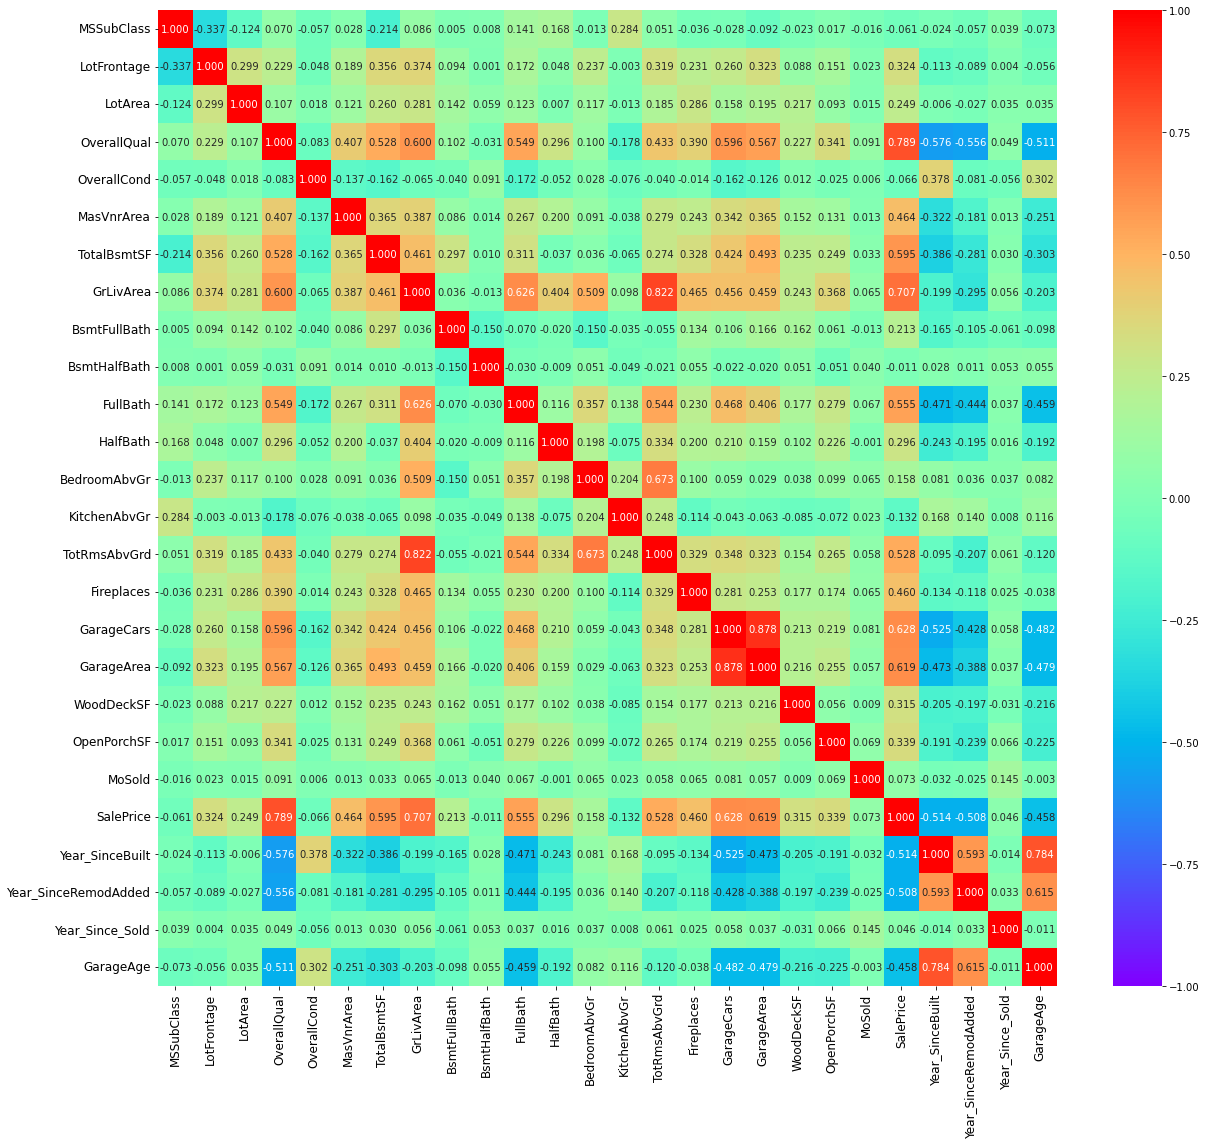

In [90]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=False, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

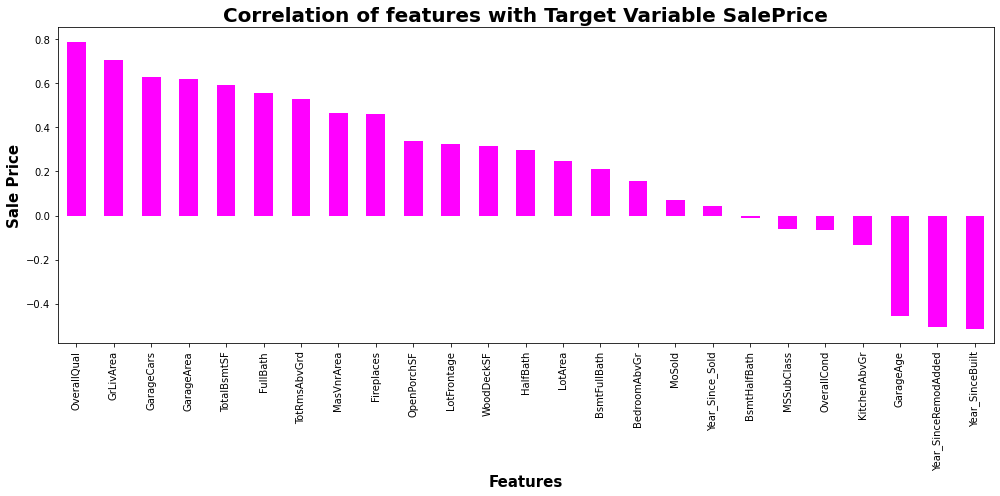

In [91]:
plt.figure(figsize = (14,7))
df.corr()['SalePrice'].drop(['SalePrice']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Sale Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable SalePrice',fontsize = 20,fontweight='bold')
plt.tight_layout()
plt.show()

# Encoding Categorical Features

In [98]:
# Grouping Numerical & Categorical features
Numerical_features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                      'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                      'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                      'MiscVal', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_Since_Sold', 
                      'LotFrontage', 'MasVnrArea', 'GarageAge']

Categorical_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
                        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                        'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 
                        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

# Label Encoding for Trainig Data 

In [100]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120         3     70.98847     4928       1         0            3   
1          20         3     95.00000    15865       1         0            3   
2          60         3     92.00000     9920       1         0            3   
3          20         3    105.00000    11751       1         0            3   
4          20         3     70.98847    16635       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0            13           2           2         4   
1          4          1            12           2           2         0   
2          1          0            15           2           2         0   
3          4          0            14           2           2         0   
4          2          0            14           2           2         0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0           2            6            5          1         1            8   
1           2            8            6          0         5           12   
2           5            7            5          1         1            7   
3           2            6            6          3         1            8   
4           2            6            7          1         1            4   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            9           2         0.0          3          4           1   
1           13           2         0.0          2          2           2   
2            7           2         0.0          2          4           2   
3            9           1       480.0          3          4           1   
4            4           3       126.0          2          4           1   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  TotalBsmtSF  \
0         2         3             3             0             5         1078   
1         3         1             1             0             4         2217   
2         2         3             0             2             5         1117   
3         2         3             3             1             5         1844   
4         2         3             3             0             5         1602   

   Heating  HeatingQC  CentralAir  Electrical  GrLivArea  BsmtFullBath  \
0        1          4           1           4        958             0   
1        1          0           1           4       2217             1   
2        1          0           1           4       2013             1   
3        1          0           1           4       1844             0   
4        1          2           1           4       1602             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         0             2             1            3   
1             0         2         0             4             1            2   
2             0         2         1             3             1            3   
3             0         2         0             3             1            3   
4             1         2         0             3             1            2   

   TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageFinish  GarageCars  \
0             5           6           1           1             1           2   
1             8           6           1           1             2           2   
2             8           6           1           1             2           2   
3             7           6           1           1             1           2   
4             8           6           1           1             0           2   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         440           4           4           2           0          205   
1         621           4           4           2          81          207   
2         455          

# Label Encoding for Testing Data

In [101]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    dft[i] = le.fit_transform(dft[i])
dft.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2    86.000000    14157       1         0            1   
1         120         2    66.425101     5814       1         0            3   
2          20         2    66.425101    11838       1         3            3   
3          70         2    75.000000    12000       1         3            0   
4          60         2    86.000000    14598       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          0          0            21           2           0         0   
1          1          0            21           2           0         4   
2          4          0             4           2           0         0   
3          4          0             5           2           0         0   
4          1          0            20           1           0         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           2            9            5       2005          2006          3   
1           2            8            5       1984          1984          1   
2           2            8            5       2001          2001          3   
3           5            7            7       1941          1950          1   
4           5            6            5       2007          2007          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         0            9           11           3       200.0          2   
1         0            5            5           2         0.0          2   
2         0            9           11           2         0.0          2   
3         0            6            7           2         0.0          3   
4         0            9           11           3        74.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3           2         0         2             1             2   
1          3           1         2         2             0             2   
2          3           2         2         2             0             5   
3          3           1         3         2             3             4   
4          3           2         2         2             2             5   

   BsmtFinType2  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0             5         1922        0          0           1           3   
1             5         1220        0          2           1           3   
2             5         1753        0          0           1           3   
3             5          704        0          0           1           3   
4             5          894        0          0           1           3   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           5           1   
1             1            2             4           5           1   
2             1            0             7           5           1   
3             1            1             7           5           1   
4             1            2             9           5           1   

   GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0           1       2005.0             0           3         676           4   
1           1       1984.0             1           2         565           4   
2           1       2001.0             1           2         522           4   
3           1  

# Training and Testing Data

In [102]:
# Splitting data in target and dependent feature
X = df.drop(['SalePrice'], axis =1)
Y = df['SalePrice']

# Standard Scaling 

In [103]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_test = scaler.fit_transform(dft)

# Machine Learning Model Building

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)

# Linear Regression

In [107]:
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 21272.123710773674
Mean squared error : 860205381.1246388
Root Mean squared error : 29329.258107300273
 R2 Score :
85.93687476200627


In [108]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7661199703080455
Difference in R2 & CV Score: 9.324877731201724


# Random Forest Regressor

In [109]:
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 17726.40207977208
Mean squared error : 674550935.0658002
Root Mean squared error : 25972.118416983245
R2 Score of Random Forest Regressor :
88.97205889733719


In [110]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.8308164898392395
Difference in R2 & CV Score: 5.890409913413237


# Decision Tree Regressor

In [111]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 26278.80056980057
Mean squared error : 1446721762.937322
Root Mean squared error : 38035.79581049044
R2 Score of Decision Tree Regressor :
76.34817244444707


In [112]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.638012777793075
Difference in R2 & CV Score: 12.546894665139575


# Extra Trees Regressor

In [113]:
etc = ExtraTreesRegressor()
etc.fit(X_train, Y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 18546.371424501423
Mean squared error : 784299145.4863164
Root Mean squared error : 28005.341374214964
R2 Score of Extra Tree Regressor :
87.17783293496115


In [114]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.8315770528760671
Difference in R2 & CV Score: 4.0201276473544425


# Ridge Regression

In [115]:
rd = Ridge()
rd.fit(X_train, Y_train)
y_pred = rd.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 21259.939952516594
Mean squared error : 859844478.3109316
Root Mean squared error : 29323.10485454996
R2 Score of XGB Regressor :
85.94277500580768


In [116]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rd, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rd,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : Ridge() :

Mean CV Score : 0.7665247082308778
Difference in R2 & CV Score: 9.290304182719893


# Hyper Parameter Tuning : GridSearchCV

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.33)

In [119]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [120]:
parameter = {
 'bootstrap': [True, False],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4 ],
 'n_estimators': [100, 500,1000,1500,2000]}

In [121]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =10)

In [122]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.869 total time=   0.6s
[CV 2/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 2/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.794 total time=   0.6s
[CV 3/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.758 total time=   0.6s
[CV 4/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.806 total time=   0.6s
[CV 5/5; 1/30] START bootstrap=True, max_features=auto, min_samples_le

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 500, 1000, 1500, 2000]},
             verbose=10)

In [123]:
GCV.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 1000}

# Final Model

In [124]:
Final_mod=RandomForestRegressor(max_depth = None, bootstrap = True, max_features='sqrt', min_samples_leaf = 1,
                                n_estimators = 100 )
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 89.10501669037028
mean_squared_error: 670501965.572849
mean_absolute_error: 17717.45883419689
RMSE value: 25894.052706612943


# Saving Final Model

In [125]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Surprise_Housing_Price_Prediction.pkl")

['Surprise_Housing_Price_Prediction.pkl']

# Predictions of Test Dataset Using Final Model

In [126]:
# Loading the saved model
model = joblib.load("Surprise_Housing_Price_Prediction.pkl")

# Prediction
prediction = model.predict(X_scale_test)
prediction

array([198796.02, 163498.82, 188963.1 , 169441.69, 190329.62, 150988.5 ,
       168776.46, 207091.05, 180200.48, 157715.22, 159923.85, 155946.19,
       174922.92, 163392.82, 211222.16, 187218.28, 156935.23, 161166.97,
       194310.14, 178812.35, 176778.23, 176602.57, 148403.63, 152509.88,
       165663.51, 140663.93, 164687.58, 157899.08, 159939.13, 144648.18,
       161052.92, 166577.  , 172888.4 , 158379.17, 155584.68, 181102.37,
       181599.98, 149364.67, 151371.64, 147782.01, 162589.1 , 189475.58,
       184673.75, 169098.35, 164978.76, 154400.15, 146819.44, 147486.53,
       160827.67, 201249.2 , 151559.55, 146068.56, 154890.32, 148213.88,
       182026.42, 176421.82, 167177.06, 180899.7 , 141663.5 , 202853.44,
       137365.5 , 169277.35, 131118.  , 167070.91, 160044.14, 123635.53,
       169442.31, 184171.75, 144496.53, 162158.87, 193080.8 , 175635.73,
       176673.95, 176888.9 , 167294.88, 177150.47, 189053.8 , 172798.28,
       182786.1 , 151088.14, 186730.87, 144958.64, 

In [127]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset
Test_data_Predication = pd.DataFrame()
Test_data_Predication['SalePrice']=prediction
Test_data_Predication.head()

SalePrice
0  198796.02
1  163498.82
2  188963.10
3  169441.69
4  190329.62

In [128]:
Final_test_data = pd.concat([dft, Test_data_Predication], axis=1)
Final_test_data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2    86.000000    14157       1         0            1   
1         120         2    66.425101     5814       1         0            3   
2          20         2    66.425101    11838       1         3            3   
3          70         2    75.000000    12000       1         3            0   
4          60         2    86.000000    14598       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          0          0            21           2           0         0   
1          1          0            21           2           0         4   
2          4          0             4           2           0         0   
3          4          0             5           2           0         0   
4          1          0            20           1           0         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           2            9            5       2005          2006          3   
1           2            8            5       1984          1984          1   
2           2            8            5       2001          2001          3   
3           5            7            7       1941          1950          1   
4           5            6            5       2007          2007          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         0            9           11           3       200.0          2   
1         0            5            5           2         0.0          2   
2         0            9           11           2         0.0          2   
3         0            6            7           2         0.0          3   
4         0            9           11           3        74.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3           2         0         2             1             2   
1          3           1         2         2             0             2   
2          3           2         2         2             0             5   
3          3           1         3         2             3             4   
4          3           2         2         2             2             5   

   BsmtFinType2  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0             5         1922        0          0           1           3   
1             5         1220        0          2           1           3   
2             5         1753        0          0           1           3   
3             5          704        0          0           1           3   
4             5          894        0          0           1           3   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           5           1   
1             1            2             4           5           1   
2             1            0             7           5           1   
3             1            1             7           5           1   
4             1            2             9           5           1   

   GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0           1       2005.0             0           3         676           4   
1           1       1984.0             1           2         565           4   
2           1       2001.0             1           2         522           4   
3           1  